# ICTS IAGRG SCHOOL 3

*Cosmic Tensions and Early Dark Energy*

**The Cosmological Standard Model, its tensions and new physics**

Lectures by Florian Niedermann 

Tutorials by Purba Mukherjee

Email: purba16@gmail.com

In [1]:
import os
import subprocess

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.constants import c as c_kms

c = c_kms/1000.

# Planck 2018 Observations

In [2]:
L, TT, TE, EE, BB, PP = np.loadtxt("plc_data/lcdm.dat", unpack=True)

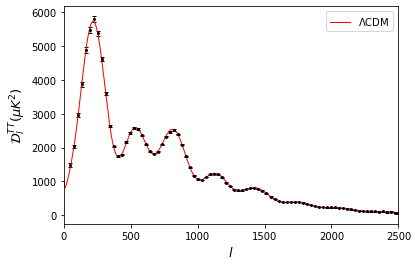

In [3]:
l_TT2, D_TT2, sigD1_TT2, sigD2_TT2, Dlcdm_TT2 = np.loadtxt("plc_data/TT_binned.dat", unpack=True)
sigD_TT2 = np.array([sigD1_TT2,sigD2_TT2])

plt.xlabel(r"$l$", fontsize=13)
plt.ylabel(r"$\mathcal{D}^{TT}_l (\mu K^2)$", fontsize=13)

plt.xlim(0,2500)

plt.errorbar(l_TT2, D_TT2, sigD_TT2, fmt='.', color='k', lw=0.5, ms='4', capsize=2)

plt.plot(L, TT, c="r", lw=1, label=r"$\Lambda$CDM")
plt.legend()
plt.show()

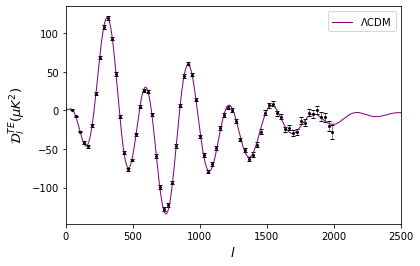

In [4]:
l_TE2, D_TE2, sigD1_TE2, sigD2_TE2, Dlcdm_TE2 = np.loadtxt("plc_data/TE_binned.dat", unpack=True)
sigD_TE2 = np.array([sigD1_TE2,sigD2_TE2])

plt.xlabel(r"$l$", fontsize=13)
plt.ylabel(r"$\mathcal{D}^{TE}_l (\mu K^2)$", fontsize=13)

plt.xlim(0,2500)

plt.errorbar(l_TE2, D_TE2, sigD_TE2, fmt='.', color='k', lw=0.5, ms='4', capsize=2)

plt.plot(L, TE, c="purple", lw=1, label=r"$\Lambda$CDM")

plt.legend()
plt.show()

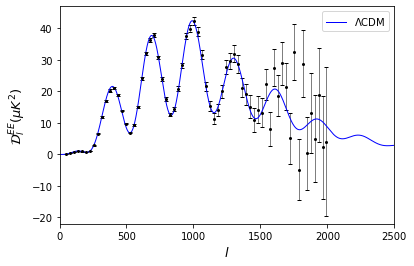

In [5]:
l_EE2, D_EE2, sigD1_EE2, sigD2_EE2, Dlcdm_EE2 = np.loadtxt("plc_data/EE_binned.dat", unpack=True)
sigD_EE2 = np.array([sigD1_EE2,sigD2_EE2])

plt.errorbar(l_EE2, D_EE2, sigD_EE2, fmt='.', color='k', lw=0.5, ms='4', capsize=2)
plt.plot(L, EE, c="b", lw=1, label=r"$\Lambda$CDM")

plt.xlabel(r"$l$", fontsize=13)
plt.ylabel(r"$\mathcal{D}^{EE}_l (\mu K^2)$", fontsize=13)

plt.xlim(0,2500)
plt.ylim(-22,47)
plt.legend()
plt.show()

In [6]:
import classy
classy.__version__

'v3.2.5'

In [7]:
from classy import Class

# Angular Power Spectrum

### Computing $C_l$'s:

In [8]:
lcdm_settings = {'output':'tCl,pCl,lCl',
        # LambdaCDM parameters
        'omega_b':0.0223828,
        'omega_cdm':0.1201075,
        'h':0.674,
        'A_s':2.1e-9,
        'tau_reio':0.05431,
         }

**computing scalars only**

In [9]:
M = Class()
M.set(lcdm_settings)
M.set({'modes':'s','lensing':'no','n_s':0.966,'l_max_scalars':3000})
M.compute()
cls = M.raw_cl(3000)
M.struct_cleanup()
M.empty()

**computing tensors only**

In [10]:
M = Class()
l_max_tensors = 600
M.set(lcdm_settings)
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)
M.struct_cleanup()
M.empty()

**scalars + tensors (only in this case we can get the correct lensed ${C_l}_{\rm BB}$)**

In [11]:
M = Class()
M.set(lcdm_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','r':0.1,'n_s':0.9619,'n_t':0,'l_max_scalars':3000,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()
M.empty()

**TT TE and EE power spectra**

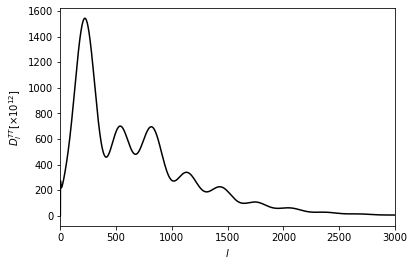

In [12]:
plt.xlim(0.,3000)
#plt.ylim([0.1,10])
plt.plot(cls['ell'], 1e12* cls['ell']*(cls['ell']+1.)/math.pi * cls['tt'],'k-',label=r'$\mathrm{TT(s)}$', lw=1.5)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$D_l^{TT} [{\times} 10^{12}]$')
plt.xlabel(r'$l$')
plt.show()

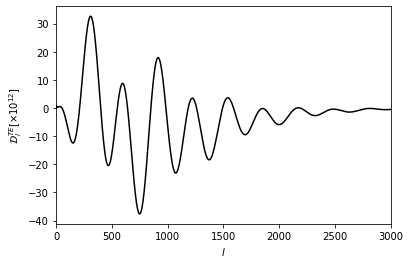

In [13]:
plt.xlim(0.,3000)
#plt.ylim([0.1,10])
plt.plot(cls['ell'], 1e12* cls['ell']*(cls['ell']+1.)/math.pi * cls['te'],'k-',label=r'$\mathrm{TT(s)}$', lw=1.5)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$\mathcal{D}_l^{TE} [{\times} 10^{12}]$')
plt.xlabel(r'$l$')
plt.show()

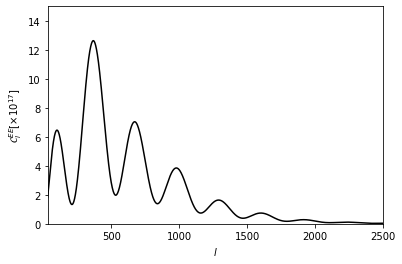

In [14]:
plt.xlim([30.,2500])
plt.ylim([0.,15.])
plt.plot(cls['ell'], 1e17 * cls['ee'],'k-',label=r'$\mathrm{EE(s)}$', lw=1.5)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$\mathcal{C}_l^{EE} [{\times} 10^{17}]$')
plt.xlabel(r'$l$')
plt.show()

**comparison between scalar, tensor and scalar + tensor**

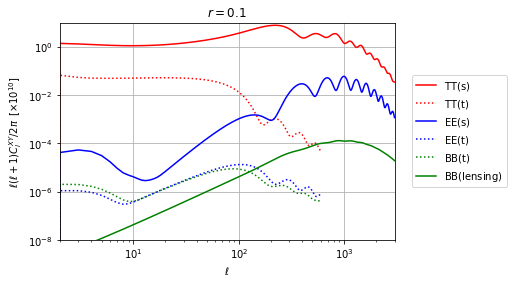

In [15]:
plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
factort = 1.e10*ellt*(ellt+1.)/2./math.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.35, 0.5))
plt.show()

# Matter Power Spectrum

**Linear $P(k)$**

In [16]:
lcdm_params = {
    'output': 'mPk',                   # Matter power spectrum
    'P_k_max_1/Mpc': 1.0,              # Maximum k (1/Mpc)
    'z_pk': '0.0,1.0,2.0',             # Redshifts for P(k)
    'h': 0.67,                         # Hubble parameter h
    'omega_b': 0.022,                  # Baryon density
    'omega_cdm': 0.12,                 # Cold dark matter density
    'A_s': 2.1e-9,                     # Scalar amplitude
    'n_s': 0.965                       # Spectral index
}

cosmo = classy.Class()
cosmo.set(lcdm_params)
cosmo.compute()

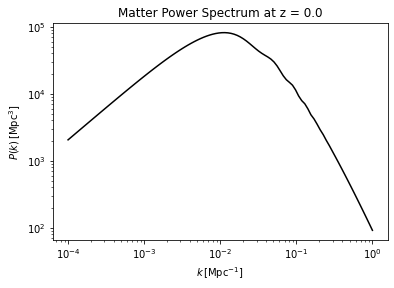

In [17]:
k_vals = np.logspace(-4, 0, 100)  # k in 1/Mpc

# Extract P(k) at redshift z = 0
z = 0.0
pk_vals = np.array([cosmo.pk(k, z) for k in k_vals])

# Plot the power spectrum
plt.loglog(k_vals, pk_vals, c ='k')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.title(f'Matter Power Spectrum at z = {z}')
plt.show()

# Clean up
cosmo.struct_cleanup()
cosmo.empty()

**Non-linear $P(k)$ <span style="color:blue">[Using Halofit]</span>:**

In [18]:
lcdm_params = {
    'output': 'mPk',                   # Matter power spectrum
    'P_k_max_1/Mpc': 1.0,              # Maximum k (1/Mpc)
    'z_pk': '0.0,1.0,2.0',             # Redshifts for P(k)
    'h': 0.67,                         # Hubble parameter h
    'omega_b': 0.022,                  # Baryon density
    'omega_cdm': 0.12,                 # Cold dark matter density
    'A_s': 2.1e-9,                     # Scalar amplitude
    'n_s': 0.965,                      # Spectral index
    'non linear': 'halofit'            # Include non-linear corrections with Halofit
}

cosmo = classy.Class()
cosmo.set(lcdm_params)
cosmo.compute()

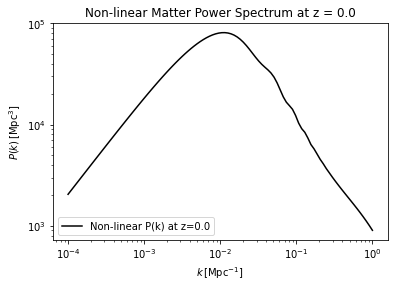

In [19]:
# Define a range of k values (in 1/Mpc)
k_vals = np.logspace(-4, 0, 100)

# Extract non-linear P(k) at redshift z = 1100
z = 0.
pk_nl_vals = np.array([cosmo.pk(k, z) for k in k_vals])

# Plot the non-linear power spectrum
plt.loglog(k_vals, pk_nl_vals, label=f'Non-linear P(k) at z={z}', c='k')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.title(f'Non-linear Matter Power Spectrum at z = {z}')
plt.legend()
plt.show()

# Clean up
cosmo.struct_cleanup()
cosmo.empty()

**Comparison**

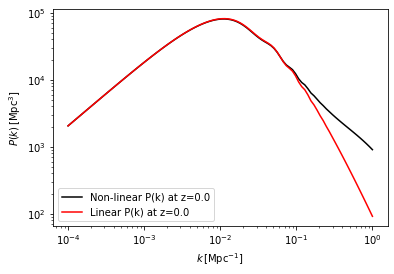

In [20]:
plt.loglog(k_vals, pk_nl_vals, label=f'Non-linear P(k) at z={z}', c='k', ls='-')
plt.loglog(k_vals, pk_vals, label=f'Linear P(k) at z={z}', c='r')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.legend()
plt.show()

1. **Effect of Changing $\Omega_{\text{m}}$:**
   
   - **Task:** Modify the matter density parameter $\Omega_{\text{m}}$ (e.g., values such as 0.2, 0.3, and 0.4) and recompute the angular power spectrum $C_\ell$. Plot the results together for comparison.
   
   - **Goal:** Analyze how variations in $\Omega_{\text{m}}$ affect the amplitude and positions of the peaks in the (A) angular, and (B) matter power spectum.


2. **Impact of Baryonic Effects:**
   - **Task:** Investigate the impact of baryonic density $\Omega_b$ on the angular power spectrum. Compare models with $\Omega_b = 0.03$, $0.05$, and $0.07$.
   - **Goal:** Assess how changes in baryonic density influence the height and position of the acoustic peaks.


3. **Varying the Hubble Parameter $h$:**
   - **Task:** Change the Hubble parameter $h$ in the $\Lambda$CDM model (e.g., $h = 0.67$, $0.73$). Compute and compare the angular power spectra.
   - **Goal:** Understand the relationship between the Hubble parameter and the features of the angular power spectrum.


**Case 2: $h = [0.67, 0.74]$ and $\omega_m = [0.119, 0.103]$**